## Machine Learning: Regressão

Predição de valor de imóvel para a cidade de Boston

### 1º Importação dos dados

In [86]:
# bibliotecas numericas numpy, pandas e para plot matplotlib e seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [87]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

#### Descrição dos objetos

In [88]:
print('Nomes das variáveis quantitativas (atributos)', boston_dataset.feature_names)
print()
print('Descrição', boston_dataset.DESCR)
print()
print('Variáveis quantitativas', boston_dataset.data)
print()
print('Variáveis qualitativas', boston_dataset.target)

Nomes das variáveis quantitativas (atributos) ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

Descrição .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centre

In [89]:
# Transformação do dataset em dataframe do Pandas, procedimento necessário por se tratar de um método de regressão
dataset = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
print(dataset.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [90]:
# Adição do target nesse dataframe
dataset['MEDV'] = boston_dataset.target

print(dataset.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### 2º Visualização e divisão dos dados

#### Organizando dataset

In [91]:
# Divisão habitual dos conjuntos entre 'features/atributos' e 'targets/saidas'
array = dataset.values
print(type(array))
x = array[:,0:13]
y = array[:,13]

<class 'numpy.ndarray'>


In [92]:
# divisão automatica dos dados
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

In [93]:
print("Formato de X_train: ", X_train.shape)
print("Formato de X_test: ", X_test.shape)
print("Formato de Y_train: ", Y_train.shape)
print("Formato de Y_test: ", Y_test.shape)

Formato de X_train:  (354, 13)
Formato de X_test:  (152, 13)
Formato de Y_train:  (354,)
Formato de Y_test:  (152,)


#### Visualizando dados

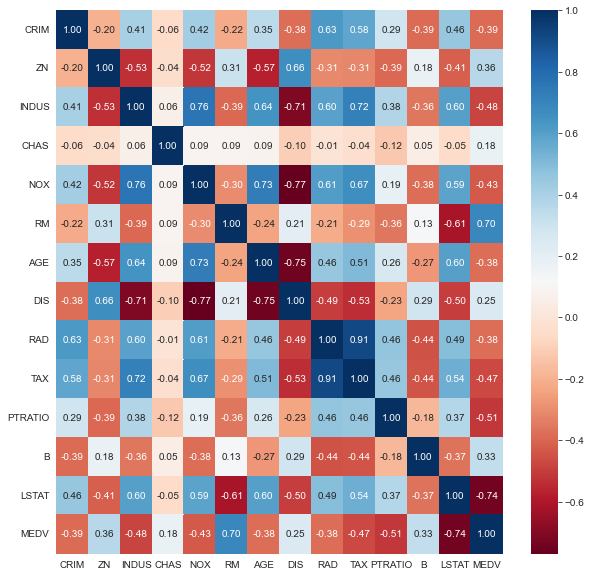

In [94]:
# Obtendo estatística de correlação
corr = dataset.corr()

# Gerando gráfico de 'heatmap' e plotando
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

# Definindo labels do gráfico
plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns, ha="center")
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns, va="center")

#show plt
plt.show()

### Mapa de correlações:

<p>Correlação variando sempre de -1 a 1.</p> 
<p>Correlações em maior intensidade de azul significam forte correlação entre atributos. </p>
<p>Correlações em maior intensidade de vermelho significam forte correlação inversa entre atributos.</p>

### 3º Aprendizado e Avaliação do modelo

In [95]:
# Importação de bibliotecas de funções de avaliação
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#### Modelo Linear Regression

In [96]:
# Loading do modelo
from sklearn.linear_model import LinearRegression

In [97]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

LinearRegression()

In [98]:
# Avaliação de desempenho de acurácia a partir do cross-validation
cv_1 = cross_val_score(estimator=model_1, X=X_train, y=Y_train, cv=10)

In [99]:
# Calculo de desempenho utilizando métrica r2 (distancia quadratica de um valor até o valor real)
y_pred_train_1 = model_1.predict(X_train)
r2_train_1 = r2_score(Y_train, y_pred_train_1)

y_pred_test_1 = model_1.predict(X_test)
r2_test_1 = r2_score(Y_test, y_pred_test_1)

In [100]:
# Calculo de desempenho utilizando RMSE

rmse_1 = (np.sqrt(mean_squared_error(Y_test, y_pred_test_1)))

In [101]:
# Exibição dos resultados
print("Modelo Linear Regression")
print("CV: ", cv_1.mean())
print("R2 train: ", r2_train_1)
print("R2 test: ", r2_test_1)
print("RMSE: ", rmse_1)

Modelo Linear Regression
CV:  0.7009079351623964
R2 train:  0.7485568277158012
R2 test:  0.6973662461809077
RMSE:  4.956122273425659


#### Modelo Decision Tree Regression

In [102]:
from sklearn.tree import DecisionTreeRegressor

In [103]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [104]:
# Avaliação do desempenho de acurácia utilizado cross-validation
cv_2 = cross_val_score(estimator=model_2, X=X_train, y=Y_train, cv=10)

In [105]:
# Calculo de desempenho utilizando métrica r2 (distancia quadratica de um valor até o valor real)
y_pred_train_2 = model_2.predict(X_train)
r2_train_2 = r2_score(Y_train, y_pred_train_2)

y_pred_test_2 = model_2.predict(X_test)
r2_test_2 = r2_score(Y_test, y_pred_test_2)

In [106]:
# Calculo de desempenho utilizando RMSE

rmse_2 = (np.sqrt(mean_squared_error(Y_test, y_pred_test_2)))

In [107]:
# Exibição dos resultados
print("Modelo Linear Regression")
print("CV: ", cv_2.mean())
print("R2 train: ", r2_train_2)
print("R2 test: ", r2_test_2)
print("RMSE: ", rmse_2)

Modelo Linear Regression
CV:  0.6373232828247628
R2 train:  1.0
R2 test:  0.38308275699642647
RMSE:  7.076145992364993


#### Modelo Polinomial Regressional de 2ª ordem

In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(x_poly, Y_train)

model_3 = LinearRegression()
model_3.fit(x_poly, Y_train)

LinearRegression()

In [118]:
print(X_train.shape)

(354, 13)


In [119]:
print(x_poly.shape)

(354, 560)


In [120]:
# Avaliação de desempenho de acurácia a partir do cross-validation
cv_3 = cross_val_score(estimator=model_3, X=x_poly, y=Y_train, cv=10)

# Calculo de desempenho utilizando métrica r2 (distancia quadratica de um valor até o valor real)
y_pred_train_3 = model_3.predict(x_poly)
r2_train_3 = r2_score(Y_train, y_pred_train_3)

y_pred_test_3 = model_3.predict(poly_reg.fit_transform(X_test))
r2_test_3 = r2_score(Y_test, y_pred_test_3)

# Calculo de desempenho utilizando RMSE
rmse_3 = (np.sqrt(mean_squared_error(Y_test, y_pred_test_3)))

In [121]:
# Exibição dos resultados
print("Modelo Linear Regression")
print("CV: ", cv_3.mean())
print("R2 train: ", r2_train_3)
print("R2 test: ", r2_test_3)
print("RMSE: ", rmse_3)

Modelo Linear Regression
CV:  -1078.2997154114798
R2 train:  1.0
R2 test:  -151.42384523567875
RMSE:  111.22688810485626


###  4º Comparação de desempenho

In [114]:
# Medição de erro

models = [('Linear Regression', rmse_1, r2_train_1, r2_test_1, cv_1.mean()),
         ('Decision Tree Regression', rmse_2, r2_train_2, r2_test_2, cv_2.mean()),
         ('Polynomial Regression (2nd)', rmse_3, r2_train_3, r2_test_3, cv_3.mean())]

In [115]:
predict = pd.DataFrame(data=models, columns=['Model', 'RMSE', 'R2_score(train)', 'R2_score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_score(train),R2_score(test),Cross-Validation
0,Linear Regression,4.956122,0.748557,0.697366,0.700908
1,Decision Tree Regression,7.076146,1.000000,0.383083,0.637323
2,Polynomial Regression (2nd),3.683977,0.936413,0.832788,0.675374
